In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from local path
data = pd.read_csv('/content/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Handle missing values
data.dropna(inplace=True)

In [5]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['ocean_proximity'])
data['ocean_proximity_<1H OCEAN'] = data['ocean_proximity_<1H OCEAN'].astype(int)
data['ocean_proximity_INLAND'] = data['ocean_proximity_INLAND'].astype(int)
data['ocean_proximity_ISLAND'] = data['ocean_proximity_ISLAND'].astype(int)
data['ocean_proximity_NEAR BAY'] = data['ocean_proximity_NEAR BAY'].astype(int)
data['ocean_proximity_NEAR OCEAN'] = data['ocean_proximity_NEAR OCEAN'].astype(int)

In [6]:
# Create price bins for classification task
# Define bins and labels for classification
bins = [0, 150000, 250000, 350000, 500001]
labels = ['Low', 'Medium', 'High', 'Very High']
data['price_category'] = pd.cut(data['median_house_value'], bins=bins, labels=labels)

In [7]:
# Split features and target for classification
X = data.drop(['median_house_value', 'price_category'], axis=1)
y = data['price_category']

In [8]:
# Split features and target for classification
X = data.drop(['median_house_value', 'price_category'], axis=1)
y = data['price_category']

In [9]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create copies for transformation to avoid modifying original data
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

In [11]:
# Apply log transformation to handle skewed features - for both train and test sets
X_train_transformed['total_rooms'] = np.log(X_train_transformed['total_rooms'] + 1)
X_train_transformed['total_bedrooms'] = np.log(X_train_transformed['total_bedrooms'] + 1)
X_train_transformed['population'] = np.log(X_train_transformed['population'] + 1)
X_train_transformed['households'] = np.log(X_train_transformed['households'] + 1)

In [12]:
X_test_transformed['total_rooms'] = np.log(X_test_transformed['total_rooms'] + 1)
X_test_transformed['total_bedrooms'] = np.log(X_test_transformed['total_bedrooms'] + 1)
X_test_transformed['population'] = np.log(X_test_transformed['population'] + 1)
X_test_transformed['households'] = np.log(X_test_transformed['households'] + 1)

In [13]:
# Create train_data for visualization
train_data = X_train_transformed.copy()
train_data['price_category'] = y_train

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

<Figure size 1500x800 with 0 Axes>

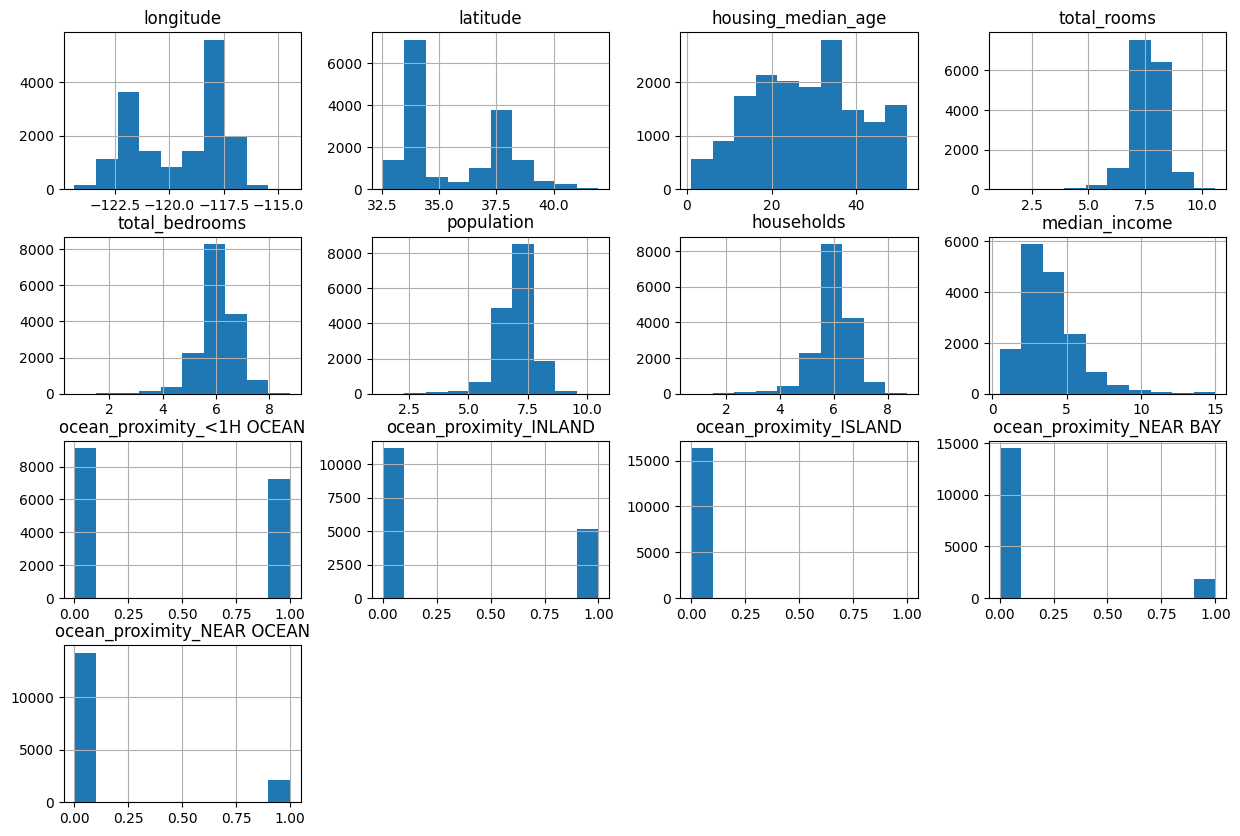

In [15]:
# Visualize data distributions
plt.figure(figsize=(15, 8))
train_data.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10))

<Axes: >

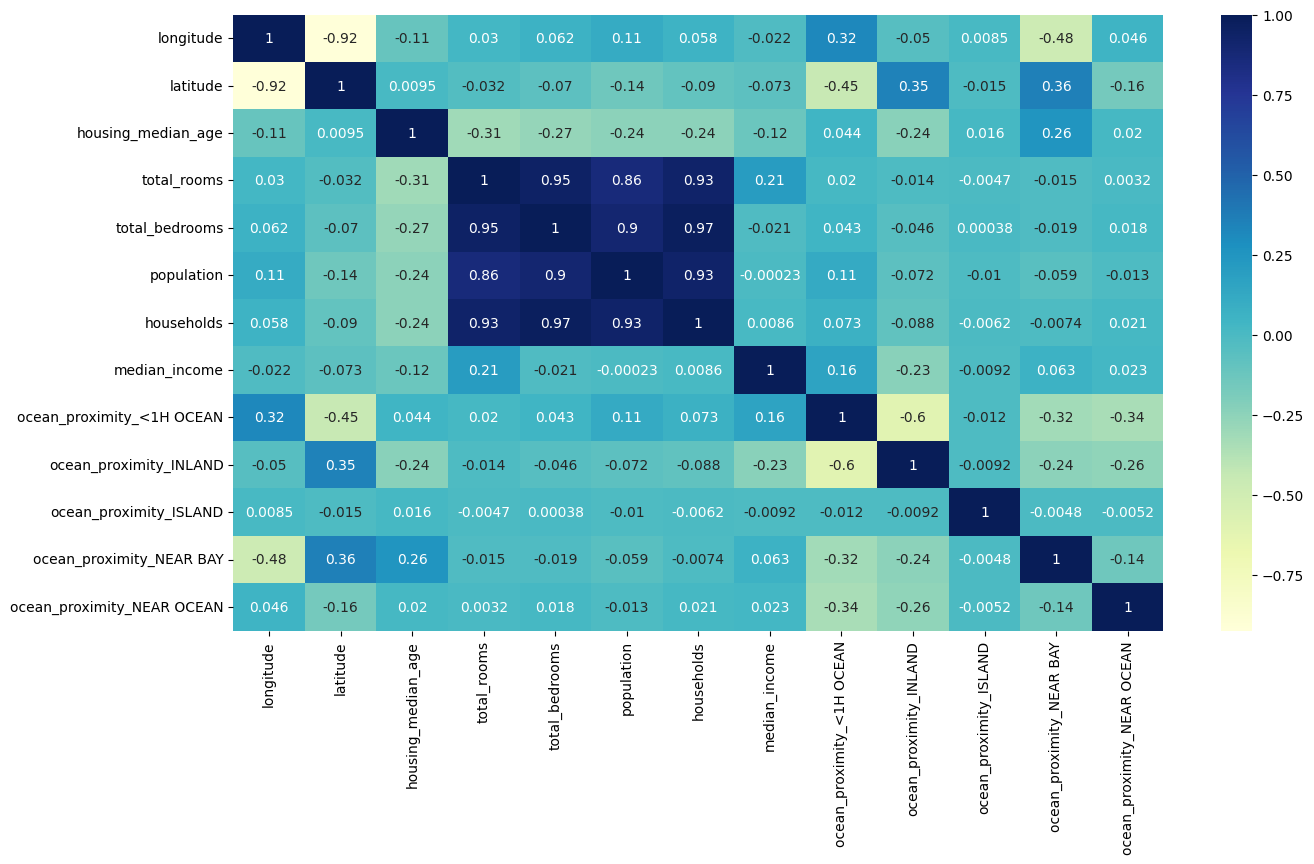

In [16]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='YlGnBu')


<Axes: xlabel='longitude', ylabel='latitude'>

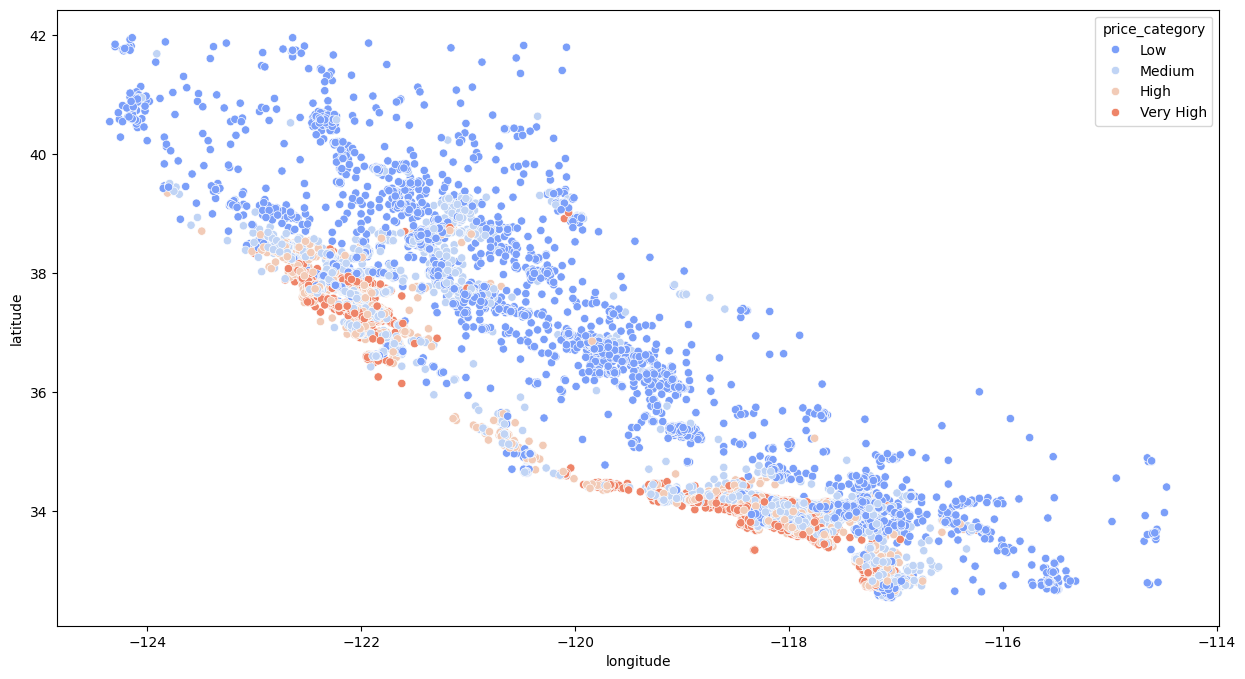

In [17]:
# Visualization of geographical distribution
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='price_category', palette='coolwarm')


In [18]:
# Feature engineering - add to both train and test sets
X_train_transformed['bedroom_ratio'] = X_train_transformed['total_bedrooms'] / X_train_transformed['total_rooms']
X_train_transformed['household_rooms'] = X_train_transformed['total_rooms'] / X_train_transformed['households']


In [19]:
X_test_transformed['bedroom_ratio'] = X_test_transformed['total_bedrooms'] / X_test_transformed['total_rooms']
X_test_transformed['household_rooms'] = X_test_transformed['total_rooms'] / X_test_transformed['households']
